<a href="https://colab.research.google.com/github/JairAlberto3945/JairAlberto3945/blob/main/Tablero_de_Colores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Huerta Díaz Jair Alberto

Distribución empírica (simulación): [0.2509 0.2494 0.248  0.2517]
Distribución teórica estacionaria : [0.25 0.25 0.25 0.25]


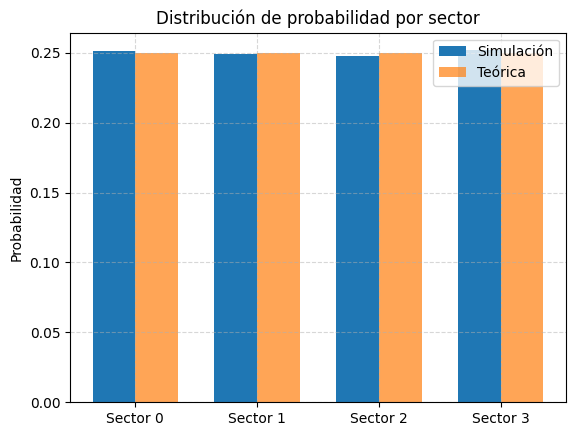

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Estados: 0, 1, 2, 3
n_states = 4
n_steps = 100000
estado_actual = 0
conteo = np.zeros(n_states)

# Probabilidades por número de caras: 0, 1, 2
movimientos = [0, 1, 2]
probabilidades = [0.25, 0.5, 0.25]

# Simulación
for _ in range(n_steps):
    avance = np.random.choice(movimientos, p=probabilidades)
    estado_actual = (estado_actual + avance) % n_states
    conteo[estado_actual] += 1

# Distribución empírica
frecuencias = conteo / n_steps

# Distribución teórica: resolver πP = π con suma π_i = 1
P = np.array([
    [0.25, 0.5, 0.25, 0],
    [0, 0.25, 0.5, 0.25],
    [0.25, 0, 0.25, 0.5],
    [0.5, 0.25, 0, 0.25]
])

# Resolver sistema lineal πP = π → (Pᵗ - I)π = 0 y suma π_i = 1
A = P.T - np.eye(n_states)
A = np.vstack([A, np.ones(n_states)])
b = np.zeros(n_states + 1)
b[-1] = 1
pi = np.linalg.lstsq(A, b, rcond=None)[0]  # distribución estacionaria

# Mostrar resultados
print("Distribución empírica (simulación):", np.round(frecuencias, 4))
print("Distribución teórica estacionaria :", np.round(pi, 4))

# Gráfica
labels = ['Sector 0', 'Sector 1', 'Sector 2', 'Sector 3']
x = np.arange(n_states)
width = 0.35

plt.bar(x - width/2, frecuencias, width, label='Simulación')
plt.bar(x + width/2, pi, width, label='Teórica', alpha=0.7)
plt.xticks(x, labels)
plt.ylabel("Probabilidad")
plt.title("Distribución de probabilidad por sector")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()